In [1]:
# 모듈 임포트 (1번)
import pandas as pd
import numpy as np
np.random.seed(42)
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from xgboost import XGBClassifier
from imblearn.over_sampling import *
import matplotlib.pyplot as plt
import math
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

In [3]:
#트레인 데이터 전처리 (2번)
df2 = pd.read_csv('train.csv')



#df2.groupby('통관지세관부호').size()
df2['통관지세관부호'][ df2['통관지세관부호'] == 10 ] = 1
df2['통관지세관부호'][ df2['통관지세관부호'] == 40 ] = 2
df2['통관지세관부호'][ df2['통관지세관부호'] == 20 ] = 3
df2['통관지세관부호'][ df2['통관지세관부호'] == 30 ] = 4
df2['통관지세관부호'][ df2['통관지세관부호'] == 16 ] = 5
df2['통관지세관부호'][ df2['통관지세관부호'] == 13 ] = 6
df2['통관지세관부호'][ df2['통관지세관부호'] > 7] = 7

#신고인부호
size1 = df2.groupby('신고인부호').size()
size = size1[df2['신고인부호']].reset_index(drop=True)
df2['신고인부호'] = size
df2['신고인부호'] = np.log1p(df2['신고인부호'])

#수입자부호
su = set(df2['수입자부호'])
df2['수입자부호'].fillna('No', inplace= True)
size2 = df2.groupby('수입자부호').size()
size = size2[df2['수입자부호']].reset_index(drop=True)
df2['수입자부호'] = size
df2['수입자부호'] = np.log1p(df2['수입자부호'])

#해외거래처부호
ha = set(df2['해외거래처부호'])
df2['해외거래처부호'].fillna('No', inplace= True)
size3 = df2.groupby('해외거래처부호').size()
size = size3[df2['해외거래처부호']].reset_index(drop=True)
df2['해외거래처부호'] = size
df2['해외거래처부호'] = np.log1p(df2['해외거래처부호'])


#특송업체부호
df2['특송업체부호'].fillna('No', inplace= True)
size4 = df2.groupby('특송업체부호').size()
size = size4[df2['특송업체부호']].reset_index(drop=True)
df2['특송업체부호'] = size
df2['특송업체부호'] = np.log1p(df2['특송업체부호'])

#수입통관계획코드
df2['수입통관계획코드'][ df2['수입통관계획코드'].isin(['C','D']) ] = 'CD'
df2['수입통관계획코드'][ df2['수입통관계획코드'].isin(['E','F']) ] = 'EF'
df2['수입통관계획코드'][ df2['수입통관계획코드'].isin(['H','Z']) ] = 'HZ'

#수입신고구분코드 
#df2['수입신고구분코드'][ df2['수입신고구분코드'].isin(['D','E']) ] = 'DE'

#수입거래구분코드
df2['수입거래구분코드'][ df2['수입거래구분코드'] == 11 ] = 1
df2['수입거래구분코드'][ df2['수입거래구분코드'] == 15 ] = 2
df2['수입거래구분코드'][ df2['수입거래구분코드'] == 94 ] = 3
df2['수입거래구분코드'][ df2['수입거래구분코드'].isin([87,91]) ] = 4
df2['수입거래구분코드'][ df2['수입거래구분코드'] > 5 ] = 5

#수입종류코드
df2['수입종류코드'][ df2['수입종류코드'] == 11 ] = 1
df2['수입종류코드'][ df2['수입종류코드'] == 21 ] = 2
df2['수입종류코드'][ df2['수입종류코드'] == 26 ] = 3
df2['수입종류코드'][ df2['수입종류코드'] > 4 ] = 4

#징수형태코드
df2['징수형태코드'][ df2['징수형태코드'] == 24 ] = 21
df2['징수형태코드'][ df2['징수형태코드'].isin([1,12,33]) ] = 99

#신고중량KG
#scaler = RobustScaler()
#scaler = MinMaxScaler()
#df2["신고중량(KG)"][df2["신고중량(KG)"] > 45000] = 45000
#df2["신고중량(KG)"][df2["신고중량(KG)"] < 200] = 200
#df2["신고중량(KG)"] = scaler.fit_transform(df2["신고중량(KG)"].to_numpy().reshape(-1,1))
df2["신고중량(KG)"] = np.log(df2["신고중량(KG)"])
df2["신고중량(KG)"][df2["신고중량(KG)"] > 10.9] = 11
df2["신고중량(KG)"][df2["신고중량(KG)"] < 4.2] = 4


#과세가격원화금액                
#df2['과세가격원화금액'][ df2['과세가격원화금액'] < 1 ] = 1
df2['과세가격원화금액'] = np.log1p(df2['과세가격원화금액'])

#df2['과세가격원화금액'][ df2['과세가격원화금액'] < 8.2 ] = df2['과세가격원화금액'].mean()
#print(df2['과세가격원화금액'].mean()) # 12.145
df2['과세가격원화금액'][ (df2['과세가격원화금액'] < 8.2) & (df2["과세가격원화금액"] > 0)] = 12.145#df2['과세가격원화금액'].mean()
df2['과세가격원화금액'][ df2['과세가격원화금액'] == 0 ] = 8
df2['과세가격원화금액'][ df2['과세가격원화금액'] > 19 ] = 19


#운송수단유형코드
df2['운송수단유형코드'][ df2['운송수단유형코드'] == 10 ] = 1
df2['운송수단유형코드'][ df2['운송수단유형코드'] == 40 ] = 2
df2['운송수단유형코드'][ df2['운송수단유형코드'].isin([30,50]) ] = 3
df2['운송수단유형코드'][ df2['운송수단유형코드'] > 4 ] = 4

import re
df2["반입보세구역부호"] = df2["반입보세구역부호"].apply(lambda x: re.findall("[0-9]{3}",str(x))[0])
df2["반입보세구역부호"] = df2["반입보세구역부호"].astype("int")

#관세율
#df2["관세율"] = df2["관세율"].astype('float')
df2['관세율'][ df2['관세율'] < 1 ] = 0.1
df2['관세율'] = np.log1p(df2['관세율'])
df2['관세율'][ df2['관세율'] > 5 ] = 5
df2 = pd.get_dummies(df2,columns = ['수입통관계획코드','징수형태코드','수입신고구분코드','반입보세구역부호',
                                    '운송수단유형코드', '통관지세관부호', #'신고중량(KG)',
                                    '수입거래구분코드','수입종류코드'])
df2.columns

<ipython-input-3-85772c1994e1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['통관지세관부호'][ df2['통관지세관부호'] == 10 ] = 1
<ipython-input-3-85772c1994e1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['통관지세관부호'][ df2['통관지세관부호'] == 40 ] = 2
<ipython-input-3-85772c1994e1>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['통관지세관부호'][ df2['통관지세관부호'] == 20 ] = 3
<ipython-input-3-85772c1994e1>:10: SettingWithCopyWarning: 
A value is

<ipython-input-3-85772c1994e1>:104: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['관세율'][ df2['관세율'] < 1 ] = 0.1
<ipython-input-3-85772c1994e1>:106: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['관세율'][ df2['관세율'] > 5 ] = 5


Index(['신고번호', '신고일자', '신고인부호', '수입자부호', '해외거래처부호', '특송업체부호', '신고중량(KG)',
       '과세가격원화금액', 'HS10단위부호', '적출국가코드',
       ...
       '통관지세관부호_7', '수입거래구분코드_1', '수입거래구분코드_2', '수입거래구분코드_3', '수입거래구분코드_4',
       '수입거래구분코드_5', '수입종류코드_1', '수입종류코드_2', '수입종류코드_3', '수입종류코드_4'],
      dtype='object', length=123)

In [11]:
# 테스트 데이터 전처리 (3번)
test = pd.read_csv('test.csv')

#df2.groupby('통관지세관부호').size()
test['통관지세관부호'][ test['통관지세관부호'] == 10 ] = 1
test['통관지세관부호'][ test['통관지세관부호'] == 40 ] = 2
test['통관지세관부호'][ test['통관지세관부호'] == 20 ] = 3
test['통관지세관부호'][ test['통관지세관부호'] == 30 ] = 4
test['통관지세관부호'][ test['통관지세관부호'] == 16 ] = 5
test['통관지세관부호'][ test['통관지세관부호'] == 13 ] = 6
test['통관지세관부호'][ test['통관지세관부호'] > 7] = 7

#신고인부호
size = size1[test['신고인부호']].reset_index(drop=True)
test['신고인부호'] = size
test['신고인부호'] = np.log1p(test['신고인부호'])

#수입자부호
test['수입자부호'][~test['수입자부호'].isin(su)] = '48X5WZU'
test['수입자부호'].fillna('No', inplace= True)
size = size2[test['수입자부호']].reset_index(drop=True)
test['수입자부호'] = size
test['수입자부호'] = np.log1p(test['수입자부호'])


#해외거래처부호
test['해외거래처부호'][~test['해외거래처부호'].isin(ha)] = '7AIOS8W'
test['해외거래처부호'].fillna('No', inplace= True)
size = size3[test['해외거래처부호']].reset_index(drop=True)
test['해외거래처부호'] = size
test['해외거래처부호'] = np.log1p(test['해외거래처부호'])

#특송업체부호
test['특송업체부호'].fillna('No', inplace= True)
size = size4[test['특송업체부호']].reset_index(drop=True)
test['특송업체부호'] = size
test['특송업체부호'] = np.log1p(test['특송업체부호'])


#수입통관계획코드
test['수입통관계획코드'][ test['수입통관계획코드'].isin(['C','D']) ] = 'CD'
test['수입통관계획코드'][ test['수입통관계획코드'].isin(['E','F']) ] = 'EF'
test['수입통관계획코드'][ test['수입통관계획코드'].isin(['H','Z']) ] = 'HZ'

#수입신고구분코드 
#df2['수입신고구분코드'][ df2['수입신고구분코드'].isin(['D','E']) ] = 'DE'

#수입거래구분코드
test['수입거래구분코드'][ test['수입거래구분코드'] == 11 ] = 1
test['수입거래구분코드'][ test['수입거래구분코드'] == 15 ] = 2
test['수입거래구분코드'][ test['수입거래구분코드'] == 94 ] = 3
test['수입거래구분코드'][ test['수입거래구분코드'].isin([87,91]) ] = 4
test['수입거래구분코드'][ test['수입거래구분코드'] > 5 ] = 5

#수입종류코드
test['수입종류코드'][ test['수입종류코드'] == 11 ] = 1
test['수입종류코드'][ test['수입종류코드'] == 21 ] = 2
test['수입종류코드'][ test['수입종류코드'] == 26 ] = 3
test['수입종류코드'][ test['수입종류코드'] > 4 ] = 4

#징수형태코드
test['징수형태코드'][ test['징수형태코드'] == 24 ] = 21
test['징수형태코드'][ test['징수형태코드'].isin([1,12,33]) ] = 99

#신고중량KG
test["신고중량(KG)"] = np.log(test["신고중량(KG)"])
test["신고중량(KG)"][test["신고중량(KG)"] > 10.9] = 11
test["신고중량(KG)"][test["신고중량(KG)"] < 4.2] = 4


#과세가격원화금액                
#df2['과세가격원화금액'][ df2['과세가격원화금액'] < 1 ] = 1
test['과세가격원화금액'] = np.log1p(test['과세가격원화금액'])
               
test['과세가격원화금액'][ (test['과세가격원화금액'] < 8.2) & (test["과세가격원화금액"] > 0)] = 12.145#df2['과세가격원화금액'].mean()
test['과세가격원화금액'][ test['과세가격원화금액'] == 0 ] = 8
test['과세가격원화금액'][ test['과세가격원화금액'] > 19 ] = 19

#운송수단유형코드
test['운송수단유형코드'][ test['운송수단유형코드'] == 10 ] = 1
test['운송수단유형코드'][ test['운송수단유형코드'] == 40 ] = 2
test['운송수단유형코드'][ test['운송수단유형코드'].isin([30,50]) ] = 3
test['운송수단유형코드'][ test['운송수단유형코드'] > 4 ] = 4

#관세율
test['관세율'][ test['관세율'] < 1 ] = 0.1
test['관세율'] = np.log1p(test['관세율'])
test['관세율'][ test['관세율'] > 5 ] = 5

test = pd.get_dummies(test,columns = ['수입통관계획코드','징수형태코드','수입신고구분코드',
                                    '운송수단유형코드', '통관지세관부호',
                                    '수입거래구분코드','수입종류코드'])
test.columns

<ipython-input-11-f13d984f1f88>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['통관지세관부호'][ test['통관지세관부호'] == 10 ] = 1
<ipython-input-11-f13d984f1f88>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['통관지세관부호'][ test['통관지세관부호'] == 40 ] = 2
<ipython-input-11-f13d984f1f88>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['통관지세관부호'][ test['통관지세관부호'] == 20 ] = 3
<ipython-input-11-f13d984f1f88>:8: SettingWithCopyWarning: 
A

Index(['신고번호', '신고일자', '신고인부호', '수입자부호', '해외거래처부호', '특송업체부호', '신고중량(KG)',
       '과세가격원화금액', '반입보세구역부호', 'HS10단위부호', '적출국가코드', '원산지국가코드', '관세율구분코드',
       '관세율', '수입통관계획코드_B', '수입통관계획코드_CD', '수입통관계획코드_EF', '수입통관계획코드_HZ',
       '징수형태코드_0', '징수형태코드_11', '징수형태코드_13', '징수형태코드_14', '징수형태코드_18',
       '징수형태코드_21', '징수형태코드_43', '징수형태코드_99', '수입신고구분코드_A', '수입신고구분코드_B',
       '수입신고구분코드_D', '수입신고구분코드_E', '운송수단유형코드_1', '운송수단유형코드_2', '운송수단유형코드_3',
       '운송수단유형코드_4', '통관지세관부호_1', '통관지세관부호_2', '통관지세관부호_3', '통관지세관부호_4',
       '통관지세관부호_5', '통관지세관부호_6', '통관지세관부호_7', '수입거래구분코드_1', '수입거래구분코드_2',
       '수입거래구분코드_3', '수입거래구분코드_4', '수입거래구분코드_5', '수입종류코드_1', '수입종류코드_2',
       '수입종류코드_3', '수입종류코드_4'],
      dtype='object')

In [12]:
#모델 실전 적합 (4번)
y_train = df2['핵심적발']
x_train = df2[['통관지세관부호_1','통관지세관부호_2','통관지세관부호_3','통관지세관부호_4','통관지세관부호_5','통관지세관부호_6',
             '통관지세관부호_7','신고인부호', '수입자부호', '해외거래처부호', '특송업체부호',
             '수입거래구분코드_1', '수입거래구분코드_2', '수입거래구분코드_3', '수입거래구분코드_4', '수입거래구분코드_5',
             '수입종류코드_1', '수입종류코드_2', '수입종류코드_3', '수입종류코드_4', '운송수단유형코드_1',
             '운송수단유형코드_2', '운송수단유형코드_3', '운송수단유형코드_4', '수입통관계획코드_B', '수입통관계획코드_CD',
             '수입통관계획코드_EF', '수입통관계획코드_HZ', '징수형태코드_0', '징수형태코드_11', '징수형태코드_13',
             '징수형태코드_14', '징수형태코드_18', '징수형태코드_21', '징수형태코드_43', '징수형태코드_99',
             '수입신고구분코드_A', '수입신고구분코드_B', '수입신고구분코드_D', '수입신고구분코드_E',
             '신고중량(KG)','과세가격원화금액','관세율']]

#y_test = test['핵심적발']
x_test = test[['통관지세관부호_1','통관지세관부호_2','통관지세관부호_3','통관지세관부호_4','통관지세관부호_5','통관지세관부호_6',
             '통관지세관부호_7','신고인부호', '수입자부호', '해외거래처부호', '특송업체부호',
             '수입거래구분코드_1', '수입거래구분코드_2', '수입거래구분코드_3', '수입거래구분코드_4', '수입거래구분코드_5',
             '수입종류코드_1', '수입종류코드_2', '수입종류코드_3', '수입종류코드_4', '운송수단유형코드_1',
             '운송수단유형코드_2', '운송수단유형코드_3', '운송수단유형코드_4', '수입통관계획코드_B', '수입통관계획코드_CD',
             '수입통관계획코드_EF', '수입통관계획코드_HZ', '징수형태코드_0', '징수형태코드_11', '징수형태코드_13',
             '징수형태코드_14', '징수형태코드_18', '징수형태코드_21', '징수형태코드_43', '징수형태코드_99',
             '수입신고구분코드_A', '수입신고구분코드_B', '수입신고구분코드_D', '수입신고구분코드_E',
             '신고중량(KG)','과세가격원화금액','관세율']]

oversampling_instance = RandomOverSampler(random_state=42)
x_train, y_train = oversampling_instance.fit_resample(x_train, y_train)


In [13]:
# 이번에 쓸 모델 (5번)
from lightgbm import LGBMClassifier 
lgbm_wrapper = LGBMClassifier(n_estimators = 250, objective = "multiclass", metric = "multi_logloss",boosting_type = "gbdt",
                              #objective = "multiclass", metric = "multi_logloss"
                              #objective = "binary", metric = "binary_logloss"
                              learning_rate = 0.008, num_leaves=95, n_jobs = -1,
                              colsample_bytree = 0.3, reg_lambda = 30,
                              max_depth = 12,boost_from_average = False,random_state=42)
lgbm_wrapper.fit(x_train, y_train, verbose = True)
pred = lgbm_wrapper.predict(x_test)
#printt2(pred7)
#실전 데이터 저장방법
test['핵심적발'] = pred
test['우범여부'] = test['핵심적발']
test['우범여부'][test['우범여부'] == 2] = 1
final = test[['신고번호','우범여부','핵심적발']]
final.to_csv(r'F:/Maximum LIkelihood Function.csv', index=False)

<ipython-input-13-21f2b861e4c0>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['우범여부'][test['우범여부'] == 2] = 1


In [5]:
#모델적합, 연습할때 
df_y = df2['핵심적발']
df_x = df2[['통관지세관부호_1','통관지세관부호_2','통관지세관부호_3','통관지세관부호_4','통관지세관부호_5','통관지세관부호_6',
             '통관지세관부호_7', '신고인부호', '수입자부호', '해외거래처부호', '특송업체부호',
             '수입거래구분코드_1', '수입거래구분코드_2', '수입거래구분코드_3', '수입거래구분코드_4', '수입거래구분코드_5',
             '수입종류코드_1', '수입종류코드_2', '수입종류코드_3', '수입종류코드_4', '운송수단유형코드_1',
             '운송수단유형코드_2', '운송수단유형코드_3', '운송수단유형코드_4', '수입통관계획코드_B', '수입통관계획코드_CD',
             '수입통관계획코드_EF', '수입통관계획코드_HZ', '징수형태코드_0', '징수형태코드_11', '징수형태코드_13',
             '징수형태코드_14', '징수형태코드_18', '징수형태코드_21', '징수형태코드_43', '징수형태코드_99',
             '수입신고구분코드_A', '수입신고구분코드_B', '수입신고구분코드_D', '수입신고구분코드_E',
             '신고중량(KG)','과세가격원화금액', '관세율',
           '반입보세구역부호_100', '반입보세구역부호_101', '반입보세구역부호_110', '반입보세구역부호_111',
       '반입보세구역부호_120', '반입보세구역부호_121', '반입보세구역부호_122', '반입보세구역부호_130',
       '반입보세구역부호_131', '반입보세구역부호_135', '반입보세구역부호_140', '반입보세구역부호_141',
       '반입보세구역부호_150', '반입보세구역부호_151', '반입보세구역부호_152', '반입보세구역부호_153',
       '반입보세구역부호_154', '반입보세구역부호_160', '반입보세구역부호_161', '반입보세구역부호_164',
       '반입보세구역부호_167', '반입보세구역부호_169', '반입보세구역부호_200', '반입보세구역부호_201',
       '반입보세구역부호_204', '반입보세구역부호_207', '반입보세구역부호_208', '반입보세구역부호_210',
       '반입보세구역부호_211', '반입보세구역부호_219', '반입보세구역부호_230', '반입보세구역부호_238',
       '반입보세구역부호_300', '반입보세구역부호_301', '반입보세구역부호_307', '반입보세구역부호_308',
       '반입보세구역부호_309', '반입보세구역부호_330', '반입보세구역부호_331', '반입보세구역부호_338',
       '반입보세구역부호_351', '반입보세구역부호_357', '반입보세구역부호_375', '반입보세구역부호_390',
       '반입보세구역부호_391', '반입보세구역부호_398', '반입보세구역부호_400', '반입보세구역부호_401',
       '반입보세구역부호_407', '반입보세구역부호_409', '반입보세구역부호_410', '반입보세구역부호_411',
       '반입보세구역부호_504', '반입보세구역부호_530', '반입보세구역부호_531', '반입보세구역부호_541',
       '반입보세구역부호_549', '반입보세구역부호_561', '반입보세구역부호_621', '반입보세구역부호_627',
       '반입보세구역부호_704', '반입보세구역부호_709', '반입보세구역부호_711', '반입보세구역부호_800',
       '반입보세구역부호_801', '반입보세구역부호_807', '반입보세구역부호_808', '반입보세구역부호_811',
       '반입보세구역부호_820', '반입보세구역부호_821', '반입보세구역부호_829', '반입보세구역부호_909']]

x_train, x_test, y_train, y_test = train_test_split(df_x,df_y,test_size=0.2, random_state=42)
oversampling_instance = RandomOverSampler(random_state=42)
x_train, y_train = oversampling_instance.fit_resample(x_train, y_train)

def printt(pred):
    print('예측정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))
    print('정밀도: {0:.4f}'.format(precision_score(y_test,pred)))
    print('재현율: {0:.4f}'.format(recall_score(y_test,pred)))
    print('f1: {0:.4f}'.format(f1_score(y_test,pred)))
def printt2(test,pred):
    print('예측정확도: {0:.4f}'.format(accuracy_score(test,pred)))
    print('정밀도: {0:.4f}'.format(precision_score(test,pred,average='macro')))
    print('재현율: {0:.4f}'.format(recall_score(test,pred,average='macro')))
    f11 = f1_score(test,pred,average='macro')
    print('f1: {0:.4f}'.format(f11))
    a = confusion_matrix(test,pred)
    print(a)
    tp = a[1][1] + a[1][2] + a[2][1] + a[2][2]
    fp = a[0][1] + a[0][2]
    fn = a[1][0] + a[2][0]
    pre = tp / (fp + tp)
    re = tp / (fn + tp)
    f1 = 2 * pre * re / (pre + re)
    print('정밀도: {0:.4f}'.format(pre))
    print('재현율: {0:.4f}'.format(re))
    print('f1: {0:.4f}'.format(f1))


In [6]:
from lightgbm import LGBMClassifier 
lgbm_wrapper = LGBMClassifier(n_estimators = 250, objective = "multiclass", metric = "multi_logloss",boosting_type = "gbdt",
                              #objective = "multiclass", metric = "multi_logloss"
                              #objective = "binary", metric = "binary_logloss"
                              learning_rate = 0.008,  num_leaves = 80, n_jobs = -1, min_child_samples = 28,
                              colsample_bytree = 0.3, reg_lambda = 39, #reg_alpha = 30, subsample =  0.3,                           
                              max_depth = 12,boost_from_average = False,random_state=42)
lgbm_wrapper.fit(x_train, y_train, verbose = True)
pred = lgbm_wrapper.predict(x_test)
printt2(y_test,pred)
pred = lgbm_wrapper.predict(x_train)
printt2(y_train,pred)

예측정확도: 0.6368
정밀도: 0.4551
재현율: 0.5102
f1: 0.4574
[[9734 1959 2246]
 [ 442  565  893]
 [ 395  575 1115]]
정밀도: 0.4281
재현율: 0.7900
f1: 0.5553
예측정확도: 0.6495
정밀도: 0.6516
재현율: 0.6495
f1: 0.6470
[[39612  7621  8664]
 [11501 29981 14415]
 [ 9467  7102 39328]]
정밀도: 0.8480
재현율: 0.8124
f1: 0.8298


In [98]:
lgbm_wrapper = LGBMClassifier(n_estimators = 250, objective = "multiclass", metric = "multi_logloss",boosting_type = "gbdt",
                              #objective = "multiclass", metric = "multi_logloss"
                              #objective = "binary", metric = "binary_logloss"
                              learning_rate = 0.008,  num_leaves = 250, n_jobs = -1, #min_child_samples = 10,
                              colsample_bytree = 0.3, reg_lambda = 30, #reg_alpha = 30, subsample =  0.3,                           
                              max_depth = 12,boost_from_average = False,random_state=42)
lgbm_wrapper.fit(x_train, y_train, verbose = True)
pred = lgbm_wrapper.predict(x_test)
printt2(y_test,pred)
#pred = lgbm_wrapper.predict(x_train)
#printt2(y_train,pred)

예측정확도: 0.6417
정밀도: 0.4559
재현율: 0.5096
f1: 0.4594
정밀도: 0.4309
재현율: 0.7782
f1: 0.5546


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

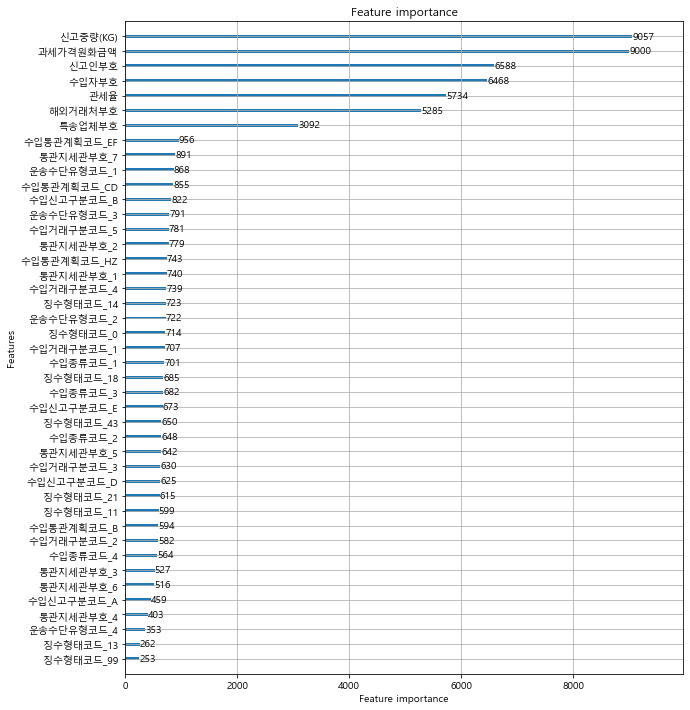

In [232]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt
plt.rc("font",family = "Malgun Gothic")
%matplotlib inline
fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(lgbm_wrapper, ax=ax)

<ipython-input-5-f94a5b976793>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['우범여부'][test['우범여부'] == 2] = 1


In [16]:
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(x_train, y_train)
pred1 = knn.predict(x_test)
printt2(pred1)
#0.5

MemoryError: Unable to allocate 1.00 GiB for an array with shape (1872, 71695) and data type float64

In [84]:
df_clt = DecisionTreeClassifier(max_depth=12, random_state=42)
df_clt.fit(x_train, y_train)
#pred2 = df_clt.predict(x_test)
#pred = np.column_stack((pred2,pred2))
#pred[:,0][pred[:,0] == 2] = 1
#pred[:20,]
#printt2(pred2)
#printt2(pred2)

pred = df_clt.predict(x_test)
printt2(y_test,pred)
pred = df_clt.predict(x_train)
printt2(y_train,pred)

예측정확도: 0.5564
정밀도: 0.4284
재현율: 0.4705
f1: 0.4106
정밀도: 0.3649
재현율: 0.8050
f1: 0.5022
예측정확도: 0.6139
정밀도: 0.6243
재현율: 0.6139
f1: 0.6166
정밀도: 0.8278
재현율: 0.8954
f1: 0.8603


In [82]:
df_clt = DecisionTreeClassifier(max_depth=7)
df_clt.fit(x_train, y_train)
pred2 = df_clt.predict(x_test)
printt2(y_test,pred2)


예측정확도: 0.5847
정밀도: 0.4319
재현율: 0.4796
f1: 0.4207
정밀도: 0.3827
재현율: 0.7910
f1: 0.5158


In [79]:
rf_clf = RandomForestClassifier(n_estimators = 100)
rf_clf.fit(x_train, y_train)
pred3 = rf_clf.predict(x_test)
#printt(pred3)
printt2(pred3)
#0.5

예측정확도: 0.7357
정밀도: 0.4460
재현율: 0.4243
f1: 0.4314


In [12]:
ada_clf = AdaBoostClassifier(n_estimators = 100)
ada_clf.fit(x_train, y_train)
pred4 = ada_clf.predict(x_test)
#printt(pred4)
printt2(pred4)
#0.575

예측정확도: 0.6977
정밀도: 0.4264
재현율: 0.3282
f1: 0.3473
예측정확도: 0.7901
정밀도: 0.5465
재현율: 0.5133
f1: 0.5294
f1aver: 0.4383


C:\ProgramData\Anaconda3\envs\ssu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
model = XGBClassifier(n_estimators=300, random_state=42, max_depth = 8,
                      use_label_encoder=False, eval_metric='logloss',
                      learning_rate=0.008)
model.fit(x_train, y_train)
pred5 = model.predict(x_test)
printt2(pred5)
from xgboost import plot_importance
import matplotlib.pyplot as plt
plt.rc("font",family = "Malgun Gothic")
%matplotlib inline
fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(model, ax=ax)
#0.57

In [8]:
lf = LogisticRegression(random_state=42)
lf.fit(x_train, y_train)
pred6 = lf.predict(x_test)
printt(pred6)
#0.56


예측정확도: 0.7797
정밀도: 0.5058
재현율: 0.3952
f1: 0.4437


C:\ProgramData\Anaconda3\envs\ssu\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [82]:
######################### 변수 중요도 80보다 큰 컬럼 택함 #########################
selected = (lgbm_wrapper.feature_importances_ > 250)
index_for_selection = np.array(range(len(selected)))
selected_column_index = index_for_selection[selected]

# 선택 컬럼 활용
train_x_selected = pd.DataFrame(x_train).iloc[:, selected_column_index]
test_x_selected = pd.DataFrame(x_test).iloc[:, selected_column_index]
x_resampled, y1_resampled =  oversampling_instance.fit_resample(train_x_selected,y_train)

lgbm_wrapper.fit(x_resampled, y1_resampled )
pred8 = lgbm_wrapper.predict(test_x_selected)
printt2(pred8)

예측정확도: 0.6520
정밀도: 0.4436
재현율: 0.4816
f1: 0.4493
정밀도: 0.4296
재현율: 0.6949
f1: 0.5309


In [ ]:
#실전 데이터 저장방법
test['핵심적발'] = pred2
test['우범여부'] = test['핵심적발']
test['우범여부'][test['우범여부'] == 2] = 1
final = test[['신고번호','우범여부','핵심적발']]
final.to_csv(r'F:/Maximum LIkelihood Function.csv', index=False)

In [46]:
def summaryy(varr):
    count = df.groupby(varr).우범여부.count()
    means = df.groupby(varr).우범여부.mean()
    summ = df.groupby(varr).우범여부.sum()
    summary = pd.DataFrame({'총개수':count,'우범개수':summ, '확률':means})
    print(summary)
summaryy('특송업체부호')

         총개수  우범개수        확률
특송업체부호                      
1A3HEJ    82    51  0.621951
1E2DJD    65    31  0.476923
1EZAFG    45    27  0.600000
24BG4R  1425   516  0.362105
26O9QU   334   160  0.479042
...      ...   ...       ...
XK2HKR   273   148  0.542125
YBNP69   159    91  0.572327
YGHZ0X    62    41  0.661290
YXAKR4   126    82  0.650794
ZVCGS6    97    65  0.670103

[80 rows x 3 columns]


In [ ]:
#변수 전처리 폐기물

df2['신고중량(KG)'][ df2['신고중량(KG)'] < 1 ] = 1
df2['신고중량(KG)'] = np.log1p(df2['신고중량(KG)'])
df2['신고중량(KG)'][df2['신고중량(KG)'] > 10.9] = -1
df2['신고중량(KG)'][df2['신고중량(KG)'] > 10.5] = -3
df2['신고중량(KG)'][df2['신고중량(KG)'] > 9.7] = -2
df2['신고중량(KG)'][df2['신고중량(KG)'] > 9.3] = -4
df2['신고중량(KG)'][df2['신고중량(KG)'] > 9.15] = -5
df2['신고중량(KG)'][df2['신고중량(KG)'] > 9.05] = -4
df2['신고중량(KG)'][df2['신고중량(KG)'] > 8.88] = -3
df2['신고중량(KG)'][df2['신고중량(KG)'] > 8.82] = -4
df2['신고중량(KG)'][df2['신고중량(KG)'] > 8.78] = -5
df2['신고중량(KG)'][df2['신고중량(KG)'] > 8.52] = -6
df2['신고중량(KG)'][df2['신고중량(KG)'] > 8.35] = -5
df2['신고중량(KG)'][df2['신고중량(KG)'] > 8.2] = -4
df2['신고중량(KG)'][df2['신고중량(KG)'] > 6.3] = -3
df2['신고중량(KG)'][df2['신고중량(KG)'] > 6.12] = -4
df2['신고중량(KG)'][df2['신고중량(KG)'] > 5.82] = -6
df2['신고중량(KG)'][df2['신고중량(KG)'] > 5.75] = -5
df2['신고중량(KG)'][df2['신고중량(KG)'] > 5.6] = -4
df2['신고중량(KG)'][df2['신고중량(KG)'] > 5.5] = -3
df2['신고중량(KG)'][df2['신고중량(KG)'] > 5.3] = -2
df2['신고중량(KG)'][df2['신고중량(KG)'] > 4.2] = -1
df2['신고중량(KG)'][df2['신고중량(KG)'] >= 0] = -3
df2['신고중량(KG)'] = -1 * df2['신고중량(KG)'] 

#분류표대로 분류
df2["HS10단위부호"] = (df2["HS10단위부호"]/100000000).astype(int)
df2["HS10단위부호"][(df2["HS10단위부호"]>=1) & (df2["HS10단위부호"]<=5) == True] = 1
df2["HS10단위부호"][(df2["HS10단위부호"]>=6) & (df2["HS10단위부호"]<=14) == True] = 2
df2["HS10단위부호"][df2["HS10단위부호"]==15] = 3
df2["HS10단위부호"][(df2["HS10단위부호"]>=16) & (df2["HS10단위부호"]<=24) == True] = 4
df2["HS10단위부호"][(df2["HS10단위부호"]>=25) & (df2["HS10단위부호"]<=28) == True] = 5
df2["HS10단위부호"][(df2["HS10단위부호"]>=29) & (df2["HS10단위부호"]<=38) == True] = 6
df2["HS10단위부호"][(df2["HS10단위부호"]>=39) & (df2["HS10단위부호"]<=40) == True] = 7
df2["HS10단위부호"][(df2["HS10단위부호"]>=41) & (df2["HS10단위부호"]<=43) == True] = 8
df2["HS10단위부호"][(df2["HS10단위부호"]>=44) & (df2["HS10단위부호"]<=46) == True] = 9
df2["HS10단위부호"][(df2["HS10단위부호"]>=47) & (df2["HS10단위부호"]<=49) == True] = 10
df2["HS10단위부호"][(df2["HS10단위부호"]>=50) & (df2["HS10단위부호"]<=63) == True] = 11
df2["HS10단위부호"][(df2["HS10단위부호"]>=64) & (df2["HS10단위부호"]<=67) == True] = 12
df2["HS10단위부호"][(df2["HS10단위부호"]>=68) & (df2["HS10단위부호"]<=70) == True] = 13
df2["HS10단위부호"][df2["HS10단위부호"]==71] = 14
df2["HS10단위부호"][(df2["HS10단위부호"]>=72) & (df2["HS10단위부호"]<=83) == True] = 15
df2["HS10단위부호"][(df2["HS10단위부호"]>=84) & (df2["HS10단위부호"]<=85) == True] = 16
df2["HS10단위부호"][(df2["HS10단위부호"]>=86) & (df2["HS10단위부호"]<=89) == True] = 17
df2["HS10단위부호"][(df2["HS10단위부호"]>=90) & (df2["HS10단위부호"]<=92) == True] = 18
df2["HS10단위부호"][df2["HS10단위부호"]==93] = 19
df2["HS10단위부호"][(df2["HS10단위부호"]>=92) & (df2["HS10단위부호"]<=96) == True] = 20
df2["HS10단위부호"][df2["HS10단위부호"]==97] = 21

In [ ]:
#모델적합, 연습할때 
df_y = df2['핵심적발']
df_x = df2[['통관지세관부호_1','통관지세관부호_2','통관지세관부호_3','통관지세관부호_4','통관지세관부호_5','통관지세관부호_6',
             '통관지세관부호_7', '신고인부호', '수입자부호', '해외거래처부호', '특송업체부호',
             '수입거래구분코드_1', '수입거래구분코드_2', '수입거래구분코드_3', '수입거래구분코드_4', '수입거래구분코드_5',
             '수입종류코드_1', '수입종류코드_2', '수입종류코드_3', '수입종류코드_4', '운송수단유형코드_1',
             '운송수단유형코드_2', '운송수단유형코드_3', '운송수단유형코드_4', '수입통관계획코드_B', '수입통관계획코드_CD',
             '수입통관계획코드_EF', '수입통관계획코드_HZ', '징수형태코드_0', '징수형태코드_11', '징수형태코드_13',
             '징수형태코드_14', '징수형태코드_18', '징수형태코드_21', '징수형태코드_43', '징수형태코드_99',
             '수입신고구분코드_A', '수입신고구분코드_B', '수입신고구분코드_D', '수입신고구분코드_E',
             '신고중량(KG)','과세가격원화금액','관세율']]

x_train, x_test, y_train, y_test = train_test_split(df_x,df_y,test_size=0.2, random_state=42)
oversampling_instance = SMOTE(random_state=42)
x_train, y_train = oversampling_instance.fit_resample(x_train, y_train)

def printt(pred):
    print('예측정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))
    print('정밀도: {0:.4f}'.format(precision_score(y_test,pred)))
    print('재현율: {0:.4f}'.format(recall_score(y_test,pred)))
    print('f1: {0:.4f}'.format(f1_score(y_test,pred)))
def printt2(test,pred):
    print('예측정확도: {0:.4f}'.format(accuracy_score(test,pred)))
    print('정밀도: {0:.4f}'.format(precision_score(test,pred,average='macro')))
    print('재현율: {0:.4f}'.format(recall_score(test,pred,average='macro')))
    f11 = f1_score(test,pred,average='macro')
    print('f1: {0:.4f}'.format(f11))
    a = confusion_matrix(test,pred)
    tp = a[1][1] + a[1][2] + a[2][1] + a[2][2]
    fp = a[0][1] + a[0][2]
    fn = a[1][0] + a[2][0]
    pre = tp / (fp + tp)
    re = tp / (fn + tp)
    f1 = 2 * pre * re / (pre + re)
    print('정밀도: {0:.4f}'.format(pre))
    print('재현율: {0:.4f}'.format(re))
    print('f1: {0:.4f}'.format(f1))
